### 多标签分类

Project

https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

Paper

https://www.cs.ccu.edu.tw/~wtchu/papers/2017MUSA-chu.pdf

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/Jian-Yin-Shine/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 36.66 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [4]:
data = pd.read_csv('Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [5]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
import os
import tqdm

In [7]:
img_width = 224
img_height = 224

x = []

for i in tqdm.trange(data.shape[0]):
  path = os.path.join('Movies-Poster_Dataset', 'Images', data['Id'][i]+'.jpg')
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img / 255.0
  x.append(img)

x = np.array(x)

100%|██████████| 7254/7254 [00:26<00:00, 274.35it/s]


In [8]:
x.shape

(7254, 224, 224, 3)

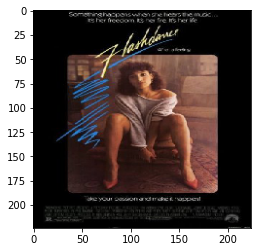

In [9]:
plt.imshow(x[1])

In [10]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [11]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.15)

In [13]:
x_train[0].shape

(224, 224, 3)

### 建立模型&训练模型

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
193/193 [==============================] - 384s 2s/step - loss: 0.4795 - accuracy: 0.2624 - val_loss: 0.2620 - val_accuracy: 0.1919
Epoch 2/8
193/193 [==============================] - 388s 2s/step - loss: 0.2338 - accuracy: 0.3392 - val_loss: 0.2406 - val_accuracy: 0.2837
Epoch 3/8
193/193 [==============================] - 391s 2s/step - loss: 0.2242 - accuracy: 0.3471 - val_loss: 0.2456 - val_accuracy: 0.2544
Epoch 4/8
193/193 [==============================] - 386s 2s/step - loss: 0.2157 - accuracy: 0.3700 - val_loss: 0.2371 - val_accuracy: 0.2764
Epoch 5/8
193/193 [==============================] - 387s 2s/step - loss: 0.1992 - accuracy: 0.3964 - val_loss: 0.2429 - val_accuracy: 0.2948
Epoch 6/8
193/193 [==============================] - 386s 2s/step - loss: 0.1708 - accuracy: 0.4435 - val_loss: 0.2653 - val_accuracy: 0.2773
Epoch 7/8
193/193 [==============================] - 388s 2s/step - loss: 0.1388 - accuracy: 0.4897 - val_loss: 0.2816 - val_accuracy: 0.2681
Epoch 

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

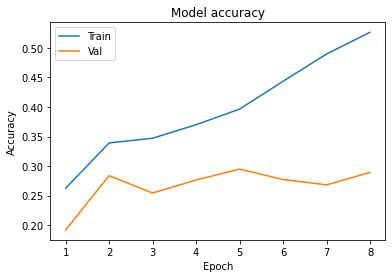

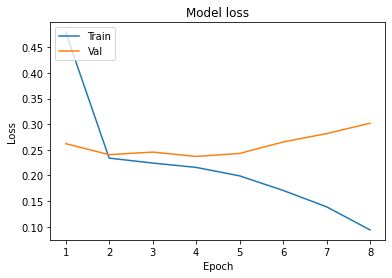

In [19]:
plot_learningCurve(history, 8)